## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os

## Import Zillow Data

In [2]:
# Load target data
home_prices = pd.read_csv('raw_data/zillow/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')

home_prices.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,232527.0,...,1124579.0,1119261.0,1114733.0,1112570.0,1113554.0,1108906.0,1104331.0,1098915.0,1089614.0,1090168.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,208780.0,...,488778.0,489319.0,490664.0,492714.0,495483.0,498200.0,500780.0,503294.0,505577.0,508007.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,184917.0,...,913735.0,916274.0,916593.0,920113.0,931353.0,934916.0,934687.0,930893.0,934775.0,945772.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,199929.0,...,336901.0,337728.0,338452.0,339876.0,341435.0,343897.0,346910.0,351188.0,355336.0,360190.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,281068.0,...,629766.0,629807.0,630985.0,632529.0,635442.0,638288.0,641416.0,644506.0,647307.0,650905.0


In [3]:
nashville_df = home_prices[(home_prices['City']=="Nashville") & (home_prices['State']=='TN')]
nashville_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
15,74101,16,37013,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109670.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
23,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,106734.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
979,74252,988,37221,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,147818.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
1059,74240,1068,37209,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109565.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
1162,74157,1171,37076,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,111805.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0
1349,74178,1362,37115,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,83431.0,...,221906.0,223547.0,225470.0,227345.0,229725.0,231768.0,233924.0,236437.0,238750.0,240945.0
1935,74238,1951,37207,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,88757.0,...,260175.0,262039.0,264413.0,267231.0,271242.0,275291.0,279386.0,283637.0,287225.0,290689.0
2201,74245,2218,37214,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,90986.0,...,256530.0,258352.0,260171.0,262305.0,264870.0,267812.0,270533.0,273683.0,276198.0,278854.0
2451,74234,2471,37203,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,147659.0,...,434632.0,436116.0,437853.0,440109.0,442457.0,444604.0,446004.0,447759.0,448556.0,449048.0
2621,74248,2645,37217,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,87304.0,...,228782.0,230040.0,231415.0,232757.0,234680.0,236802.0,238992.0,241559.0,243559.0,245680.0


## Import Airbnb Data

In [4]:
listing_files = glob('raw_data/airbnb/listings/*.csv.gz')
listing_files

['raw_data/airbnb/listings\\listings_10_15.csv.gz',
 'raw_data/airbnb/listings\\listings_10_18.csv.gz',
 'raw_data/airbnb/listings\\listings_10_19.csv.gz',
 'raw_data/airbnb/listings\\listings_10_20.csv.gz',
 'raw_data/airbnb/listings\\listings_11_18.csv.gz',
 'raw_data/airbnb/listings\\listings_11_19.csv.gz',
 'raw_data/airbnb/listings\\listings_11_20.csv.gz',
 'raw_data/airbnb/listings\\listings_12_18.csv.gz',
 'raw_data/airbnb/listings\\listings_12_19.csv.gz',
 'raw_data/airbnb/listings\\listings_12_20.csv.gz',
 'raw_data/airbnb/listings\\listings_1_19.csv.gz',
 'raw_data/airbnb/listings\\listings_1_20.csv.gz',
 'raw_data/airbnb/listings\\listings_1_21.csv.gz',
 'raw_data/airbnb/listings\\listings_2_19.csv.gz',
 'raw_data/airbnb/listings\\listings_2_20.csv.gz',
 'raw_data/airbnb/listings\\listings_2_21.csv.gz',
 'raw_data/airbnb/listings\\listings_3_19.csv.gz',
 'raw_data/airbnb/listings\\listings_3_20.csv.gz',
 'raw_data/airbnb/listings\\listings_4_18.csv.gz',
 'raw_data/airbnb/lis

In [5]:
dfs = []
for file in listing_files:
    df = pd.read_csv(file, index_col=0, header=0)
    dfs.append(df)

In [6]:
airbnb_df = pd.concat(dfs, axis=0, ignore_index=True)

In [7]:
airbnb_df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathrooms_text,number_of_reviews_l30d,last_searched,region_id,region_name,region_parent_id
0,https://www.airbnb.com/rooms/5795487,20151002210713,2015-10-03,Luxurious Cozy Guesthouse Retreat,650 sq ft - completely private & separate from...,NaN,650 sq ft - completely private & separate from...,none,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.airbnb.com/rooms/8082102,20151002210713,2015-10-03,Jetty's Renaissance Ranch,"Relax in this tranquil, rural, Ranch home Tuck...",Located on a private dead end road; establishe...,"Relax in this tranquil, rural, Ranch home Tuck...",none,"It is very tranquil, Yet a short drive to Nash...",Very quiet the perfect relaxing setting for th...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.airbnb.com/rooms/2480117,20151002210713,2015-10-03,Roomy Teal Room,Our beautiful home features the Roomy Teal Roo...,Our space is clean and comfortable. Tracey is ...,Our beautiful home features the Roomy Teal Roo...,none,Tracy (phone number hidden) Live in house manager,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.airbnb.com/rooms/8291271,20151002210713,2015-10-03,Private Suite (Apartment style),This is a mother-n-law private suite with full...,The space is over 1000+ sqft. It's a lovely q...,This is a mother-n-law private suite with full...,none,"This is a very established neighborhood, surro...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.airbnb.com/rooms/997187,20151002210713,2015-10-03,2 private rooms in Nashville,"House Rules. 1. No over night quests, or addit...",This is a brand new home and a beautiful place...,"House Rules. 1. No over night quests, or addit...",none,This community is wonderful. It is a very safe...,I do not allow any pets.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#can use last scraped as a proxy for date
airbnb_df.last_scraped.value_counts()

2020-02-22    7574
2020-01-14    7506
2019-11-20    7396
2019-10-18    7371
2019-08-14    7200
              ... 
2019-07-15       1
2021-02-25       1
2019-10-11       1
2020-09-06       1
2020-10-01       1
Name: last_scraped, Length: 77, dtype: int64

In [9]:
reviews_df = pd.read_csv('raw_data/airbnb/reviews_2_21.csv.gz', compression='gzip')
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...
1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...
2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...
3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...
4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...


In [10]:
calendar_df = pd.read_csv('raw_data/airbnb/calendar_2_21.csv.gz', compression='gzip')
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6422,2021-02-20,f,$40.00,$40.00,30.0,365.0
1,6422,2021-02-21,f,$40.00,$40.00,30.0,365.0
2,6422,2021-02-22,f,$40.00,$40.00,30.0,365.0
3,6422,2021-02-23,f,$40.00,$40.00,30.0,365.0
4,6422,2021-02-24,f,$40.00,$40.00,30.0,365.0


## Clean Zillow Data

In [11]:
nashville_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
15,74101,16,37013,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109670.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
23,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,106734.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
979,74252,988,37221,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,147818.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
1059,74240,1068,37209,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109565.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
1162,74157,1171,37076,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,111805.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0


In [12]:
nashville_prices_df = nashville_df.drop(columns=['RegionID', 'SizeRank', 'RegionType', 
                                                 'StateName', 'State', 'City', 'Metro', 'CountyName'])

In [13]:
nashville_prices_df.head()

,RegionName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
15,37013,109670.0,110113.0,110502.0,111295.0,112128.0,112982.0,113867.0,114736.0,115551.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
23,37211,106734.0,107099.0,107465.0,108224.0,108963.0,109639.0,110367.0,111082.0,111876.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
979,37221,147818.0,148278.0,148776.0,149757.0,150615.0,151485.0,152349.0,153349.0,154261.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
1059,37209,109565.0,109833.0,110119.0,110736.0,111338.0,112027.0,112493.0,113092.0,113650.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
1162,37076,111805.0,112174.0,112465.0,113059.0,113683.0,114306.0,114862.0,115347.0,115830.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0


In [14]:
nashville_prices_df.set_index('RegionName', inplace=True)
nashville_prices_df.head()

,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
RegionName,,,,,,,,,,,,,,,,,,,,,
37013,109670.0,110113.0,110502.0,111295.0,112128.0,112982.0,113867.0,114736.0,115551.0,116199.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
37211,106734.0,107099.0,107465.0,108224.0,108963.0,109639.0,110367.0,111082.0,111876.0,112514.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
37221,147818.0,148278.0,148776.0,149757.0,150615.0,151485.0,152349.0,153349.0,154261.0,155079.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
37209,109565.0,109833.0,110119.0,110736.0,111338.0,112027.0,112493.0,113092.0,113650.0,114305.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
37076,111805.0,112174.0,112465.0,113059.0,113683.0,114306.0,114862.0,115347.0,115830.0,116427.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0


In [15]:
nashville_prices_df = nashville_prices_df.transpose()
nashville_prices_df.head()

RegionName,37013,37211,37221,37209,37076,37115,37207,37214,37203,37217,...,37216,37212,37210,37204,37218,37080,37220,37219,37189,37201
1996-01-31,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,87304.0,...,88121.0,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN
1996-02-29,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,87676.0,...,88466.0,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN
1996-03-31,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,87963.0,...,88751.0,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN
1996-04-30,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,88595.0,...,89336.0,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN
1996-05-31,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,89211.0,...,89922.0,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN


In [16]:
nashville_prices_df.reset_index(inplace=True)
nashville_prices_df.head()

RegionName,index,37013,37211,37221,37209,37076,37115,37207,37214,37203,...,37216,37212,37210,37204,37218,37080,37220,37219,37189,37201
0,1996-01-31,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,...,88121.0,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN
1,1996-02-29,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,...,88466.0,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN
2,1996-03-31,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,...,88751.0,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN
3,1996-04-30,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,...,89336.0,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN
4,1996-05-31,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,...,89922.0,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN


In [17]:
nashville_prices_df['index'] = pd.to_datetime(nashville_prices_df['index'])

In [18]:
nashville_prices_df.set_index('index', inplace=True)
nashville_prices_df

RegionName,37013,37211,37221,37209,37076,37115,37207,37214,37203,37217,...,37216,37212,37210,37204,37218,37080,37220,37219,37189,37201
index,,,,,,,,,,,,,,,,,,,,,
1996-01-31,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,87304.0,...,88121.0,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN
1996-02-29,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,87676.0,...,88466.0,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN
1996-03-31,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,87963.0,...,88751.0,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN
1996-04-30,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,88595.0,...,89336.0,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN
1996-05-31,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,89211.0,...,89922.0,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,259031.0,293072.0,352922.0,372219.0,276223.0,231768.0,275291.0,267812.0,444604.0,236802.0,...,353126.0,544627.0,287125.0,649146.0,241525.0,244317.0,561117.0,430796.0,266038.0,383293.0
2020-11-30,261394.0,295822.0,355478.0,375011.0,278581.0,233924.0,279386.0,270533.0,446004.0,238992.0,...,356012.0,546918.0,289395.0,654508.0,242735.0,246970.0,566165.0,430763.0,268952.0,383351.0
2020-12-31,264071.0,299249.0,358583.0,378519.0,281249.0,236437.0,283637.0,273683.0,447759.0,241559.0,...,359699.0,550457.0,292281.0,660564.0,244148.0,249040.0,572388.0,432595.0,271794.0,383955.0


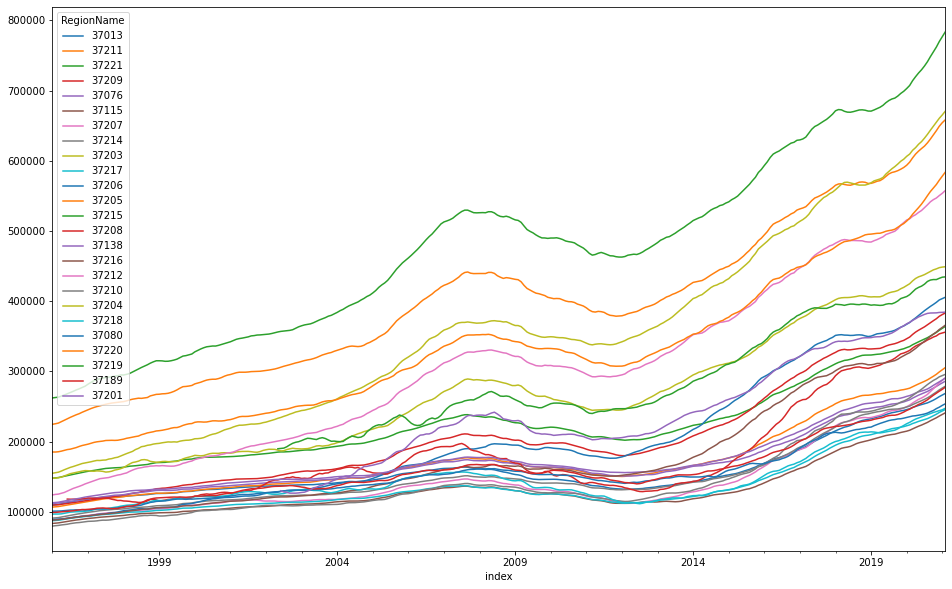

In [19]:
nashville_prices_df.plot(figsize = (16,10), subplots=False, legend=True);

In [20]:
nashville_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302 entries, 1996-01-31 to 2021-02-28
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   37013   302 non-null    float64
 1   37211   302 non-null    float64
 2   37221   302 non-null    float64
 3   37209   302 non-null    float64
 4   37076   302 non-null    float64
 5   37115   302 non-null    float64
 6   37207   302 non-null    float64
 7   37214   302 non-null    float64
 8   37203   302 non-null    float64
 9   37217   302 non-null    float64
 10  37206   302 non-null    float64
 11  37205   302 non-null    float64
 12  37215   302 non-null    float64
 13  37208   297 non-null    float64
 14  37138   302 non-null    float64
 15  37216   302 non-null    float64
 16  37212   302 non-null    float64
 17  37210   302 non-null    float64
 18  37204   302 non-null    float64
 19  37218   302 non-null    float64
 20  37080   302 non-null    float64
 21  37220   302 non-null

In [21]:
nashville_prices_df.isna().sum()

RegionName
37013     0
37211     0
37221     0
37209     0
37076     0
37115     0
37207     0
37214     0
37203     0
37217     0
37206     0
37205     0
37215     0
37208     5
37138     0
37216     0
37212     0
37210     0
37204     0
37218     0
37080     0
37220     0
37219    76
37189     0
37201    77
dtype: int64

## Clean Airbnb Data

In [23]:
airbnb_df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathrooms_text,number_of_reviews_l30d,last_searched,region_id,region_name,region_parent_id
0,https://www.airbnb.com/rooms/5795487,20151002210713,2015-10-03,Luxurious Cozy Guesthouse Retreat,650 sq ft - completely private & separate from...,NaN,650 sq ft - completely private & separate from...,none,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.airbnb.com/rooms/8082102,20151002210713,2015-10-03,Jetty's Renaissance Ranch,"Relax in this tranquil, rural, Ranch home Tuck...",Located on a private dead end road; establishe...,"Relax in this tranquil, rural, Ranch home Tuck...",none,"It is very tranquil, Yet a short drive to Nash...",Very quiet the perfect relaxing setting for th...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.airbnb.com/rooms/2480117,20151002210713,2015-10-03,Roomy Teal Room,Our beautiful home features the Roomy Teal Roo...,Our space is clean and comfortable. Tracey is ...,Our beautiful home features the Roomy Teal Roo...,none,Tracy (phone number hidden) Live in house manager,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.airbnb.com/rooms/8291271,20151002210713,2015-10-03,Private Suite (Apartment style),This is a mother-n-law private suite with full...,The space is over 1000+ sqft. It's a lovely q...,This is a mother-n-law private suite with full...,none,"This is a very established neighborhood, surro...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.airbnb.com/rooms/997187,20151002210713,2015-10-03,2 private rooms in Nashville,"House Rules. 1. No over night quests, or addit...",This is a brand new home and a beautiful place...,"House Rules. 1. No over night quests, or addit...",none,This community is wonderful. It is a very safe...,I do not allow any pets.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
airbnb_df[airbnb_df['zipcode']=='46616']

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathrooms_text,number_of_reviews_l30d,last_searched,region_id,region_name,region_parent_id
7832,https://www.airbnb.com/rooms/28632083,20181011013023,2018-10-11,Keller Park House,Keller Park House,NaN,"Keller Park House Keller Park, 7 minute drive ...",none,NaN,"Keller Park, 7 minute drive from Notre Dame, a...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196949,https://www.airbnb.com/rooms/28632083,20190814165512,2019-08-14,Keller Park House,Keller Park House,"Keller Park, 7 minute drive from Notre Dame, a...","Keller Park House Keller Park, 7 minute drive ...",none,NaN,"Keller Park, 7 minute drive from Notre Dame, a...",...,0.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
airbnb_df.zipcode.value_counts()

37203           28656
37206           24376
37212           14365
37219           12586
37208           12510
                ...  
37222               2
37026               1
37206\n37206        1
37240               1
37143.0             1
Name: zipcode, Length: 86, dtype: int64

In [25]:
airbnb_df.property_type.value_counts()

House                       83494
Apartment                   48013
Condominium                 15571
Townhouse                   15067
Entire house                13731
                            ...  
Room in resort                  4
Hut                             3
Cave                            1
Shared room in townhouse        1
Private room                    1
Name: property_type, Length: 90, dtype: int64

In [26]:
airbnb_df.accommodates.value_counts()

4     54451
2     39250
6     38933
10    22595
8     21328
12    17915
3     10844
5     10677
16     4646
7      4612
1      3885
9      2356
14      652
11      538
13      193
15      175
20      169
24       71
22       25
37       24
48       16
30       14
36       11
80       10
32        8
17        5
18        4
25        2
35        1
0         1
Name: accommodates, dtype: int64

In [27]:
airbnb_df.room_type.value_counts()

Entire home/apt    198817
Private room        32089
Hotel room           1458
Shared room          1047
Name: room_type, dtype: int64

In [28]:
airbnb_df.bed_type.value_counts()

Real Bed         189710
Pull-out Sofa       396
Futon               370
Airbed              220
Couch                76
Name: bed_type, dtype: int64

In [29]:
airbnb_df.square_feet.value_counts()

1000.0    120
1500.0     58
0.0        52
1200.0     33
800.0      32
600.0      31
690.0      31
300.0      31
374.0      29
2600.0     29
650.0      29
400.0      28
1260.0     26
1400.0     25
168.0      24
1380.0     24
850.0      14
900.0      12
750.0      10
1.0         6
1800.0      6
350.0       5
270.0       5
3500.0      4
2700.0      4
1770.0      4
256.0       3
5000.0      1
2300.0      1
120.0       1
1450.0      1
Name: square_feet, dtype: int64

In [30]:
airbnb_df.guests_included.value_counts()

1.0     92478
2.0     33162
4.0     24054
6.0     15731
8.0      8971
10.0     5058
3.0      3737
5.0      2864
12.0     1959
16.0      922
7.0       871
9.0       306
0.0       162
14.0      152
11.0      147
13.0       60
20.0       60
35.0       25
15.0       22
24.0       12
48.0        7
32.0        7
30.0        5
Name: guests_included, dtype: int64

In [31]:
airbnb_df.market.value_counts()

Nashville                190405
Other (Domestic)             32
Other (International)        13
Carlsbad                      7
D.C.                          1
Name: market, dtype: int64

In [32]:
for col_name in airbnb_df.columns:
    print(col_name)

listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_revie

In [86]:
# create df of columns to be used in regression
reg_airbnb_df = airbnb_df[['last_scraped','host_id','neighbourhood_cleansed', 'zipcode',
                          'latitude','longitude','property_type','room_type','accommodates',
                          'bathrooms','bedrooms','beds','bed_type','square_feet','price','weekly_price',
                          'monthly_price','guests_included','minimum_nights','maximum_nights','number_of_reviews']].copy()

In [87]:
reg_airbnb_df.head()

,last_scraped,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,beds,bed_type,square_feet,price,weekly_price,monthly_price,guests_included,minimum_nights,maximum_nights,number_of_reviews
0,2015-10-03,30066816,District 1,37080,36.274038,-86.910077,House,Entire home/apt,2,1.0,...,1.0,Real Bed,NaN,$125.00,$800.00,NaN,2.0,2.0,1125.0,19
1,2015-10-03,55304,District 1,37189,36.259632,-86.870691,House,Private room,4,1.0,...,3.0,Real Bed,NaN,$75.00,$315.00,"$1,113.00",1.0,1.0,1125.0,0
2,2015-10-03,3155867,District 1,37218,36.217547,-86.843971,House,Private room,2,0.5,...,1.0,Real Bed,NaN,$45.00,$315.00,"$1,000.00",1.0,2.0,1125.0,60
3,2015-10-03,1356379,District 1,37218,36.212933,-86.853004,House,Private room,2,1.0,...,1.0,Real Bed,NaN,$150.00,NaN,NaN,2.0,1.0,1125.0,0
4,2015-10-03,5479170,District 1,37218,36.221009,-86.873935,House,Private room,1,2.0,...,1.0,Pull-out Sofa,NaN,$150.00,$300.00,$500.00,1.0,1.0,1125.0,4


In [88]:
reg_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233411 entries, 0 to 233410
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   last_scraped            233411 non-null  object 
 1   host_id                 233411 non-null  int64  
 2   neighbourhood_cleansed  233411 non-null  object 
 3   zipcode                 189855 non-null  object 
 4   latitude                233411 non-null  float64
 5   longitude               233411 non-null  float64
 6   property_type           233410 non-null  object 
 7   room_type               233411 non-null  object 
 8   accommodates            233411 non-null  int64  
 9   bathrooms               190749 non-null  float64
 10  bedrooms                224183 non-null  float64
 11  beds                    226529 non-null  float64
 12  bed_type                190772 non-null  object 
 13  square_feet             679 non-null     float64
 14  price               

### Change datatype of price columns

In [89]:
def convert_dol_to_float(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('float')
    return df

In [90]:
cols_to_convert = ['price', 'weekly_price', 'monthly_price']

for col in cols_to_convert:
    reg_airbnb_df = convert_dol_to_float(reg_airbnb_df, col)

In [91]:
reg_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233411 entries, 0 to 233410
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   last_scraped            233411 non-null  object 
 1   host_id                 233411 non-null  int64  
 2   neighbourhood_cleansed  233411 non-null  object 
 3   zipcode                 189855 non-null  object 
 4   latitude                233411 non-null  float64
 5   longitude               233411 non-null  float64
 6   property_type           233410 non-null  object 
 7   room_type               233411 non-null  object 
 8   accommodates            233411 non-null  int64  
 9   bathrooms               190749 non-null  float64
 10  bedrooms                224183 non-null  float64
 11  beds                    226529 non-null  float64
 12  bed_type                190772 non-null  object 
 13  square_feet             679 non-null     float64
 14  price               

### Make sure zipcode values are correct

In [92]:
reg_airbnb_df['zipcode'].nunique()

86

In [93]:
reg_airbnb_df['neighbourhood_cleansed'].nunique()

35

In [94]:
reg_airbnb_df['zipcode'].value_counts(dropna=False)

NaN             43556
37203           28656
37206           24376
37212           14365
37219           12586
                ...  
37213.0             2
37143.0             1
37206\n37206        1
37240               1
37026               1
Name: zipcode, Length: 87, dtype: int64

In [95]:
reg_airbnb_df['zipcode'] = reg_airbnb_df['zipcode'].fillna(0)

In [96]:
reg_airbnb_df['zipcode'] = reg_airbnb_df['zipcode'].astype(str)

In [97]:
reg_airbnb_df['zipcode'] = reg_airbnb_df['zipcode'].apply(lambda x: x[0:5])

In [98]:
reg_airbnb_df['zipcode'].value_counts(dropna=False)

0         43556
37203     28800
37206     24757
37212     14540
37219     12614
37208     12590
37209     12156
37216     11487
37207     11093
37214      8741
37204      8541
37210      8479
37211      7623
37201      6310
37205      3182
37217      2567
37215      2297
37013      2294
37076      2166
37115      1969
37221      1691
37218      1493
37072      1071
37138       840
37220       558
37228       458
37080       423
37027       406
37189       312
37143        89
\n           82
37213        41
37015        36
37073        21
37064        15
37232        13
TN 37        13
46617        10
37135         9
37029         8
37243         7
37020         7
32317         6
77807         6
16823         6
48108         6
28774         6
3720          5
37122         3
46616         2
37222         2
37086         2
37240         1
37026         1
Name: zipcode, dtype: int64

In [100]:
reg_airbnb_df['zipcode'] = reg_airbnb_df['zipcode'].replace(['\n    ','TN 37','3720'],0)

In [101]:
reg_airbnb_df['zipcode'].value_counts(dropna=False)

0        43556
37203    28800
37206    24757
37212    14540
37219    12614
37208    12590
37209    12156
37216    11487
37207    11093
37214     8741
37204     8541
37210     8479
37211     7623
37201     6310
37205     3182
37217     2567
37215     2297
37013     2294
37076     2166
37115     1969
37221     1691
37218     1493
37072     1071
37138      840
37220      558
37228      458
37080      423
37027      406
37189      312
0          100
37143       89
37213       41
37015       36
37073       21
37064       15
37232       13
46617       10
37135        9
37029        8
37243        7
37020        7
32317        6
28774        6
77807        6
16823        6
48108        6
37122        3
37086        2
37222        2
46616        2
37240        1
37026        1
Name: zipcode, dtype: int64

In [102]:
reg_airbnb_df['zipcode'] = reg_airbnb_df['zipcode'].astype(int)

### Need to convert/insert missing zipcode values based on neighborhoods

In [105]:
districts = list(reg_airbnb_df['neighbourhood_cleansed'].unique())

In [106]:
codes = []
for district in districts:
    code = reg_airbnb_df[reg_airbnb_df['neighbourhood_cleansed']==district]['zipcode'].mode()[0]
    codes.append(code)

In [107]:
codes

[37218,
 37206,
 37203,
 37214,
 37217,
 37203,
 37207,
 37216,
 37013,
 37013,
 37221,
 37205,
 37013,
 37215,
 37221,
 37115,
 37211,
 37214,
 37214,
 37211,
 37209,
 37215,
 37211,
 37211,
 37013,
 37207,
 37216,
 37207,
 37072,
 37203,
 37212,
 37209,
 37076,
 37138,
 37211]

In [108]:
type(districts)

list

In [109]:
# UNCOMMENT AFTER RESTARTING KERNEL
# district_zip_dict = dict(zip(districts,codes))
# district_zip_dict

In [110]:
district_zip_dict = {districts[i]: codes[i] for i in range(len(districts))}

In [111]:
district_zip_dict

{'District 1': 37218,
 'District 6': 37206,
 'District 19': 37203,
 'District 13': 37214,
 'District 29': 37217,
 'District 21': 37203,
 'District 2': 37207,
 'District 8': 37216,
 'District 31': 37013,
 'District 32': 37013,
 'District 22': 37221,
 'District 23': 37205,
 'District 33': 37013,
 'District 34': 37215,
 'District 35': 37221,
 'District 9': 37115,
 'District 4': 37211,
 'District 14': 37214,
 'District 15': 37214,
 'District 16': 37211,
 'District 24': 37209,
 'District 25': 37215,
 'District 26': 37211,
 'District 27': 37211,
 'District 28': 37013,
 'District 5': 37207,
 'District 7': 37216,
 'District 3': 37207,
 'District 10': 37072,
 'District 17': 37203,
 'District 18': 37212,
 'District 20': 37209,
 'District 12': 37076,
 'District 11': 37138,
 'District 30': 37211}

In [112]:
reg_airbnb_df['zipcode'].replace(0, np.nan, inplace=True)

In [113]:
reg_airbnb_df['zipcode'] = reg_airbnb_df['zipcode'].fillna(reg_airbnb_df['neighbourhood_cleansed'].map(district_zip_dict))

In [114]:
reg_airbnb_df['zipcode'].value_counts()

37203.0    48568
37206.0    28312
37207.0    16509
37212.0    16474
37209.0    14276
37216.0    14200
37219.0    12614
37208.0    12590
37214.0    11415
37211.0     9717
37204.0     8541
37210.0     8479
37201.0     6310
37205.0     3402
37215.0     2971
37013.0     2842
37217.0     2835
37076.0     2563
37115.0     2096
37221.0     2078
37218.0     1833
37072.0     1307
37138.0     1025
37220.0      558
37228.0      458
37080.0      423
37027.0      406
37189.0      312
37143.0       89
37213.0       41
37015.0       36
37073.0       21
37064.0       15
37232.0       13
46617.0       10
37135.0        9
37029.0        8
37243.0        7
37020.0        7
32317.0        6
48108.0        6
77807.0        6
28774.0        6
16823.0        6
37122.0        3
37086.0        2
37222.0        2
46616.0        2
37240.0        1
37026.0        1
Name: zipcode, dtype: int64

In [115]:
reg_airbnb_df.groupby(['neighbourhood_cleansed']).mean()

,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,guests_included,minimum_nights,maximum_nights,number_of_reviews
neighbourhood_cleansed,,,,,,,,,,,,,,,,
District 1,1.032692e+08,37181.929651,36.246457,-86.871252,6.390307,1.678752,2.281301,4.361304,1770.000000,235.059177,1233.369369,2176.857143,2.774905,4.195083,676.195617,33.350703
District 10,8.386240e+07,37086.541392,36.320419,-86.716666,5.163370,1.534544,1.932779,2.666165,1000.000000,152.911668,748.809524,2545.964286,2.641275,3.353869,625.329076,34.690842
District 11,1.114289e+08,37129.205193,36.239990,-86.628067,4.493300,1.545410,1.784416,2.328755,NaN,220.045943,1563.444444,8033.925000,2.205331,5.455403,524.180103,24.925461
District 12,7.399929e+07,37076.047992,36.177317,-86.591244,3.991654,1.428996,1.599354,2.122228,2600.000000,93.034013,717.659091,1399.698953,1.625739,13.403959,686.805778,29.886281
District 13,9.631862e+07,37214.948672,36.130385,-86.667341,5.041278,1.511659,1.882730,2.660728,NaN,235.622639,598.362319,1628.787037,2.680269,5.119896,619.432071,44.616655
District 14,1.016394e+08,37181.329718,36.164896,-86.637987,5.202278,1.385506,1.941374,2.921840,1000.000000,133.125039,560.025641,1513.000000,2.389808,9.189579,588.696785,46.907809
District 15,8.944613e+07,37213.558771,36.198896,-86.695827,6.157059,1.660000,1.973758,3.209222,940.363636,186.155891,874.201271,2732.718750,2.395493,3.835743,469.685252,33.708624
District 16,6.508427e+07,37210.849661,36.110596,-86.735831,5.381959,1.451685,2.026875,2.861305,217.391304,139.786251,685.296943,2090.225714,2.872485,4.251492,622.800637,66.697381
District 17,9.328723e+07,37205.128208,36.134231,-86.777931,7.619834,2.430622,2.700269,4.688165,826.640000,350.443056,1420.239514,4207.346315,3.498328,3.013356,747.879060,48.054325


In [116]:
reg_airbnb_df.neighbourhood_cleansed.isna().sum()

0

In [117]:
reg_airbnb_df.zipcode.isna().sum()

0

In [118]:
reg_airbnb_df.zipcode.nunique()

50

In [119]:
reg_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233411 entries, 0 to 233410
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   last_scraped            233411 non-null  object 
 1   host_id                 233411 non-null  int64  
 2   neighbourhood_cleansed  233411 non-null  object 
 3   zipcode                 233411 non-null  float64
 4   latitude                233411 non-null  float64
 5   longitude               233411 non-null  float64
 6   property_type           233410 non-null  object 
 7   room_type               233411 non-null  object 
 8   accommodates            233411 non-null  int64  
 9   bathrooms               190749 non-null  float64
 10  bedrooms                224183 non-null  float64
 11  beds                    226529 non-null  float64
 12  bed_type                190772 non-null  object 
 13  square_feet             679 non-null     float64
 14  price               

### Drop/Handle Missing Values

In [120]:
reg_airbnb_df.isna().sum()/len(reg_airbnb_df)

last_scraped              0.000000
host_id                   0.000000
neighbourhood_cleansed    0.000000
zipcode                   0.000000
latitude                  0.000000
longitude                 0.000000
property_type             0.000004
room_type                 0.000000
accommodates              0.000000
bathrooms                 0.182776
bedrooms                  0.039535
beds                      0.029484
bed_type                  0.182678
square_feet               0.997091
price                     0.028623
weekly_price              0.934305
monthly_price             0.945765
guests_included           0.182678
minimum_nights            0.028623
maximum_nights            0.028623
number_of_reviews         0.000000
dtype: float64

#### Drop columns with too many missing values (+90%)

In [121]:
reg_airbnb_df.drop(columns=['square_feet','weekly_price','monthly_price'], inplace=True)

#### Explore other columns with missing values

In [122]:
reg_airbnb_df[reg_airbnb_df['guests_included'].isnull()]

,last_scraped,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
15348,2020-10-24,12172,District 6,37206.0,36.17315,-86.73581,Private room in house,Private room,2,NaN,2.0,3.0,NaN,40.0,NaN,30.0,365.0,674
15349,2020-10-24,79021,District 7,37216.0,36.19640,-86.70427,Private room in house,Private room,1,NaN,1.0,1.0,NaN,65.0,NaN,60.0,185.0,138
15350,2020-10-24,79021,District 7,37216.0,36.19705,-86.70494,Private room in house,Private room,1,NaN,1.0,2.0,NaN,65.0,NaN,60.0,185.0,107
15351,2020-10-24,79021,District 7,37216.0,36.19712,-86.70445,Private room in house,Private room,1,NaN,1.0,1.0,NaN,65.0,NaN,30.0,1125.0,5
15352,2020-10-24,95811,District 6,37206.0,36.17826,-86.74162,Private room in house,Private room,2,NaN,1.0,1.0,NaN,75.0,NaN,2.0,30.0,510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233406,2020-09-28,205078166,District 19,37203.0,36.15196,-86.72262,Private room in apartment,Private room,2,NaN,1.0,1.0,NaN,44.0,NaN,2.0,365.0,0
233407,2020-09-29,94998356,District 5,37207.0,36.20849,-86.76260,Private room in house,Private room,1,NaN,1.0,1.0,NaN,39.0,NaN,30.0,365.0,0
233408,2020-09-28,43945988,District 19,37203.0,36.16745,-86.78223,Entire apartment,Entire home/apt,4,NaN,1.0,1.0,NaN,5000.0,NaN,1.0,1125.0,0
233409,2020-09-28,10919198,District 6,37206.0,36.19105,-86.73082,Entire house,Entire home/apt,13,NaN,4.0,9.0,NaN,357.0,NaN,2.0,1125.0,0


In [123]:
reg_airbnb_df[reg_airbnb_df['beds'].isnull()]

,last_scraped,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
954,2015-10-03,15815201,District 34,37215.0,36.058964,-86.846800,Bed & Breakfast,Private room,2,1.0,1.0,NaN,Real Bed,65.0,1.0,1.0,1125.0,5
2290,2018-10-11,15815201,District 34,37215.0,36.058964,-86.846800,House,Private room,2,1.0,1.0,NaN,Real Bed,80.0,1.0,90.0,1125.0,33
7737,2018-10-11,9805687,District 16,37211.0,36.109004,-86.746843,Townhouse,Entire home/apt,12,2.0,4.0,NaN,Real Bed,97.0,6.0,1.0,180.0,3
12321,2019-10-18,9805687,District 16,37211.0,36.109000,-86.746840,Townhouse,Entire home/apt,12,2.0,4.0,NaN,Real Bed,115.0,6.0,1.0,180.0,31
19715,2020-10-24,57338877,District 12,37076.0,36.196080,-86.594460,Campsite,Entire home/apt,6,NaN,1.0,NaN,NaN,19.0,NaN,1.0,1125.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232249,2020-09-28,60643668,District 24,37209.0,36.124130,-86.847290,Private room in condominium,Private room,1,NaN,1.0,NaN,NaN,65.0,NaN,1.0,7.0,1
232305,2020-09-29,209608937,District 6,37206.0,36.189170,-86.736940,Private room in serviced apartment,Private room,1,NaN,NaN,NaN,NaN,85.0,NaN,20.0,45.0,0
232863,2020-09-29,349818867,District 6,37206.0,36.194990,-86.703020,Private room in house,Private room,2,NaN,1.0,NaN,NaN,40.0,NaN,30.0,1125.0,0
232919,2020-09-29,16537355,District 7,37216.0,36.195720,-86.721790,Private room in house,Private room,3,NaN,1.0,NaN,NaN,85.0,NaN,2.0,1125.0,1


In [127]:
# drop rows that have bathrooms, bedrooms and beds missing

reg_airbnb_df.dropna(how='all', subset=['bathrooms','bedrooms','beds'],inplace=True)

In [128]:
reg_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233393 entries, 0 to 233410
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   last_scraped            233393 non-null  object 
 1   host_id                 233393 non-null  int64  
 2   neighbourhood_cleansed  233393 non-null  object 
 3   zipcode                 233393 non-null  float64
 4   latitude                233393 non-null  float64
 5   longitude               233393 non-null  float64
 6   property_type           233392 non-null  object 
 7   room_type               233393 non-null  object 
 8   accommodates            233393 non-null  int64  
 9   bathrooms               190749 non-null  float64
 10  bedrooms                224183 non-null  float64
 11  beds                    226529 non-null  float64
 12  bed_type                190769 non-null  object 
 13  price                   226716 non-null  float64
 14  guests_included     

In [130]:
reg_airbnb_df.isna().sum()/len(reg_airbnb_df)

last_scraped              0.000000
host_id                   0.000000
neighbourhood_cleansed    0.000000
zipcode                   0.000000
latitude                  0.000000
longitude                 0.000000
property_type             0.000004
room_type                 0.000000
accommodates              0.000000
bathrooms                 0.182713
bedrooms                  0.039461
beds                      0.029410
bed_type                  0.182628
price                     0.028608
guests_included           0.182628
minimum_nights            0.028608
maximum_nights            0.028608
number_of_reviews         0.000000
dtype: float64

In [131]:
# impute values
reg_airbnb_df.describe()

,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
count,2.333930e+05,233393.000000,233393.000000,233393.000000,233393.000000,190749.000000,224183.000000,226529.000000,226716.000000,190769.000000,226716.000000,2.267160e+05,233393.000000
mean,8.657035e+07,37203.194693,36.160336,-86.769240,5.949681,1.752106,2.052587,3.323817,256.845282,2.895182,3.893541,4.806140e+04,48.427652
std,8.223633e+07,253.114834,0.041525,0.053230,3.528618,1.141982,1.444017,3.000061,495.398947,2.804066,12.009402,1.008486e+07,73.845832
min,1.147000e+03,16823.000000,35.984430,-87.041401,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000
25%,2.110914e+07,37203.000000,36.139470,-86.795260,4.000000,1.000000,1.000000,2.000000,98.000000,1.000000,1.000000,3.000000e+01,3.000000
50%,6.075922e+07,37207.000000,36.160900,-86.777102,5.000000,1.000000,2.000000,2.000000,150.000000,2.000000,2.000000,1.125000e+03,20.000000
75%,1.243187e+08,37212.000000,36.181810,-86.742200,8.000000,2.000000,3.000000,4.000000,275.000000,4.000000,2.000000,1.125000e+03,63.000000
max,3.885408e+08,77807.000000,36.398480,-86.519730,80.000000,37.000000,37.000000,66.000000,25000.000000,48.000000,550.000000,2.147484e+09,1007.000000


In [135]:
reg_airbnb_df['beds'] = reg_airbnb_df['beds'].fillna(reg_airbnb_df['bedrooms'])

In [138]:
reg_airbnb_df['bedrooms'] = reg_airbnb_df['bedrooms'].fillna(reg_airbnb_df['beds'])

In [139]:
reg_airbnb_df[reg_airbnb_df['beds'].isnull()]

,last_scraped,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
93301,2020-02-22,31035865,District 19,37203.0,36.15424,-86.77451,Apartment,Entire home/apt,4,1.0,NaN,NaN,Real Bed,249.0,1.0,2.0,1125.0,0
113001,2020-03-17,31035865,District 19,37203.0,36.15424,-86.77451,Apartment,Entire home/apt,4,1.0,NaN,NaN,Real Bed,249.0,1.0,2.0,1125.0,2
113048,2020-03-18,209608937,District 6,37206.0,36.18917,-86.73694,Serviced apartment,Private room,1,1.0,NaN,NaN,Real Bed,85.0,1.0,20.0,45.0,0
113213,2020-03-17,318524192,District 19,37203.0,36.15647,-86.77523,Resort,Private room,2,1.0,NaN,NaN,Real Bed,389.0,1.0,5.0,5.0,0
132005,2020-04-21,31035865,District 19,37203.0,36.15424,-86.77451,Apartment,Entire home/apt,4,1.0,NaN,NaN,Real Bed,249.0,1.0,2.0,1125.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186552,2020-07-27,6675690,District 5,37206.0,36.18486,-86.75555,Townhouse,Entire home/apt,6,1.0,NaN,NaN,Real Bed,NaN,1.0,NaN,NaN,0
186553,2020-07-27,6675690,District 5,37206.0,36.18645,-86.75449,Townhouse,Entire home/apt,10,2.5,NaN,NaN,Real Bed,NaN,1.0,NaN,NaN,0
186554,2020-07-27,6675690,District 5,37206.0,36.18658,-86.75566,Townhouse,Entire home/apt,10,2.5,NaN,NaN,Real Bed,NaN,1.0,NaN,NaN,0
186555,2020-07-28,6675690,District 5,37206.0,36.18582,-86.75414,Townhouse,Entire home/apt,10,2.5,NaN,NaN,Real Bed,NaN,1.0,NaN,NaN,0


In [140]:
reg_airbnb_df[reg_airbnb_df['bedrooms'].isnull()]

,last_scraped,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
93301,2020-02-22,31035865,District 19,37203.0,36.15424,-86.77451,Apartment,Entire home/apt,4,1.0,NaN,NaN,Real Bed,249.0,1.0,2.0,1125.0,0
113001,2020-03-17,31035865,District 19,37203.0,36.15424,-86.77451,Apartment,Entire home/apt,4,1.0,NaN,NaN,Real Bed,249.0,1.0,2.0,1125.0,2
113048,2020-03-18,209608937,District 6,37206.0,36.18917,-86.73694,Serviced apartment,Private room,1,1.0,NaN,NaN,Real Bed,85.0,1.0,20.0,45.0,0
113213,2020-03-17,318524192,District 19,37203.0,36.15647,-86.77523,Resort,Private room,2,1.0,NaN,NaN,Real Bed,389.0,1.0,5.0,5.0,0
132005,2020-04-21,31035865,District 19,37203.0,36.15424,-86.77451,Apartment,Entire home/apt,4,1.0,NaN,NaN,Real Bed,249.0,1.0,2.0,1125.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186552,2020-07-27,6675690,District 5,37206.0,36.18486,-86.75555,Townhouse,Entire home/apt,6,1.0,NaN,NaN,Real Bed,NaN,1.0,NaN,NaN,0
186553,2020-07-27,6675690,District 5,37206.0,36.18645,-86.75449,Townhouse,Entire home/apt,10,2.5,NaN,NaN,Real Bed,NaN,1.0,NaN,NaN,0
186554,2020-07-27,6675690,District 5,37206.0,36.18658,-86.75566,Townhouse,Entire home/apt,10,2.5,NaN,NaN,Real Bed,NaN,1.0,NaN,NaN,0
186555,2020-07-28,6675690,District 5,37206.0,36.18582,-86.75414,Townhouse,Entire home/apt,10,2.5,NaN,NaN,Real Bed,NaN,1.0,NaN,NaN,0


In [141]:
reg_airbnb_df[reg_airbnb_df['price'].isnull()]

,last_scraped,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
179876,2020-07-27,12172,District 6,37206.0,36.17315,-86.73581,House,Private room,2,1.0,NaN,NaN,Real Bed,NaN,1.0,NaN,NaN,674
179877,2020-07-28,79021,District 7,37216.0,36.19640,-86.70427,House,Private room,1,1.0,NaN,NaN,Real Bed,NaN,1.0,NaN,NaN,138
179878,2020-07-27,79021,District 7,37216.0,36.19705,-86.70494,House,Private room,1,1.0,NaN,NaN,Real Bed,NaN,1.0,NaN,NaN,107
179879,2020-07-27,79021,District 7,37216.0,36.19712,-86.70445,House,Private room,1,1.0,NaN,NaN,Real Bed,NaN,1.0,NaN,NaN,5
179880,2020-07-28,95811,District 6,37206.0,36.17826,-86.74162,House,Private room,2,1.0,NaN,NaN,Real Bed,NaN,1.0,NaN,NaN,510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186552,2020-07-27,6675690,District 5,37206.0,36.18486,-86.75555,Townhouse,Entire home/apt,6,1.0,NaN,NaN,Real Bed,NaN,1.0,NaN,NaN,0
186553,2020-07-27,6675690,District 5,37206.0,36.18645,-86.75449,Townhouse,Entire home/apt,10,2.5,NaN,NaN,Real Bed,NaN,1.0,NaN,NaN,0
186554,2020-07-27,6675690,District 5,37206.0,36.18658,-86.75566,Townhouse,Entire home/apt,10,2.5,NaN,NaN,Real Bed,NaN,1.0,NaN,NaN,0
186555,2020-07-28,6675690,District 5,37206.0,36.18582,-86.75414,Townhouse,Entire home/apt,10,2.5,NaN,NaN,Real Bed,NaN,1.0,NaN,NaN,0


In [132]:
reg_airbnb_df.mode()

,last_scraped,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
0,2020-02-22,4962900,District 19,37203.0,36.11303,-86.76811,House,Entire home/apt,4,1.0,1.0,2.0,Real Bed,150.0,1.0,2.0,1125.0,0


In [143]:
reg_airbnb_df.isna().sum()

last_scraped                  0
host_id                       0
neighbourhood_cleansed        0
zipcode                       0
latitude                      0
longitude                     0
property_type                 1
room_type                     0
accommodates                  0
bathrooms                 42644
bedrooms                   6687
beds                       6687
bed_type                  42624
price                      6677
guests_included           42624
minimum_nights             6677
maximum_nights             6677
number_of_reviews             0
dtype: int64

In [161]:
missing_cols =['bathrooms','bedrooms','beds','bed_type','guests_included',
               'minimum_nights','maximum_nights','property_type','price']

In [162]:
for col in missing_cols:
    try:
        mode = reg_airbnb_df[col].mode()[0]
        reg_airbnb_df[col] = reg_airbnb_df[col].fillna(value=mode)
    except:
        continue

In [163]:
reg_airbnb_df.isna().sum()

last_scraped              0
host_id                   0
neighbourhood_cleansed    0
zipcode                   0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
price                     0
guests_included           0
minimum_nights            0
maximum_nights            0
number_of_reviews         0
dtype: int64

### Convert Date to DateTime type

In [165]:
reg_airbnb_df['last_scraped'] = pd.to_datetime(reg_airbnb_df['last_scraped'],format='%Y/%m/%d')
reg_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233393 entries, 0 to 233410
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   last_scraped            233393 non-null  datetime64[ns]
 1   host_id                 233393 non-null  int64         
 2   neighbourhood_cleansed  233393 non-null  object        
 3   zipcode                 233393 non-null  float64       
 4   latitude                233393 non-null  float64       
 5   longitude               233393 non-null  float64       
 6   property_type           233393 non-null  object        
 7   room_type               233393 non-null  object        
 8   accommodates            233393 non-null  int64         
 9   bathrooms               233393 non-null  float64       
 10  bedrooms                233393 non-null  float64       
 11  beds                    233393 non-null  float64       
 12  bed_type                233393

In [196]:
reg_airbnb_df.reset_index(inplace=True)

In [197]:
reg_airbnb_df

,last_scraped,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
0,2015-10-03,30066816,District 1,37080.0,36.274038,-86.910077,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,125.0,2.0,2.0,1125.0,19
1,2015-10-03,55304,District 1,37189.0,36.259632,-86.870691,House,Private room,4,1.0,1.0,3.0,Real Bed,75.0,1.0,1.0,1125.0,0
2,2015-10-03,3155867,District 1,37218.0,36.217547,-86.843971,House,Private room,2,0.5,1.0,1.0,Real Bed,45.0,1.0,2.0,1125.0,60
3,2015-10-03,1356379,District 1,37218.0,36.212933,-86.853004,House,Private room,2,1.0,1.0,1.0,Real Bed,150.0,2.0,1.0,1125.0,0
4,2015-10-03,5479170,District 1,37218.0,36.221009,-86.873935,House,Private room,1,2.0,1.0,1.0,Pull-out Sofa,150.0,1.0,1.0,1125.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233388,2020-09-28,205078166,District 19,37203.0,36.151960,-86.722620,Private room in apartment,Private room,2,1.0,1.0,1.0,Real Bed,44.0,1.0,2.0,365.0,0
233389,2020-09-29,94998356,District 5,37207.0,36.208490,-86.762600,Private room in house,Private room,1,1.0,1.0,1.0,Real Bed,39.0,1.0,30.0,365.0,0
233390,2020-09-28,43945988,District 19,37203.0,36.167450,-86.782230,Entire apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,5000.0,1.0,1.0,1125.0,0
233391,2020-09-28,10919198,District 6,37206.0,36.191050,-86.730820,Entire house,Entire home/apt,13,1.0,4.0,9.0,Real Bed,357.0,1.0,2.0,1125.0,0


In [199]:
reg_airbnb_df.groupby(['zipcode']).mean()

,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
zipcode,,,,,,,,,,,,
16823.0,2.067552e+08,36.155351,-86.803159,7.000000,3.000000,5.000000,5.333333,934.000000,1.000000,2.000000,7.000000,0.000000
28774.0,2.067552e+08,36.156800,-86.801220,20.000000,6.000000,7.000000,17.500000,1069.000000,1.000000,2.000000,7.000000,0.000000
32317.0,2.067552e+08,36.154699,-86.802810,7.000000,2.000000,3.000000,4.500000,747.000000,1.000000,2.000000,7.000000,0.000000
37013.0,1.273417e+08,36.051407,-86.646830,4.310697,1.456193,1.809289,2.361717,121.546094,1.983462,4.374032,858.027797,27.662562
37015.0,6.351410e+07,36.233483,-86.918687,2.666667,1.055556,1.361111,1.583333,100.805556,2.194444,2.000000,269.722222,35.138889
37020.0,2.840499e+08,36.195500,-86.773330,16.285714,3.500000,4.285714,5.571429,533.142857,14.571429,1.142857,473.571429,22.857143
37026.0,1.212351e+08,36.192810,-86.725560,4.000000,1.000000,1.000000,2.000000,155.000000,1.000000,3.000000,1125.000000,0.000000
37027.0,5.197166e+07,36.039386,-86.775111,4.039409,1.307882,1.679803,2.280788,131.995074,1.795567,13.618227,615.842365,25.571429
37029.0,1.669219e+07,36.353824,-86.743231,5.750000,1.500000,2.000000,2.000000,103.750000,4.000000,1.500000,200.000000,16.375000


### Create a df of current airbnb listings

In [166]:
current_listings_df = reg_airbnb_df[reg_airbnb_df['last_scraped']>'2021-02']

In [167]:
current_listings_df

,last_scraped,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
93447,2021-02-20,12172,District 6,37206.0,36.17315,-86.73581,Private room in house,Private room,2,1.0,2.0,3.0,Real Bed,40.0,1.0,30.0,365.0,674
93448,2021-02-20,95811,District 6,37206.0,36.17826,-86.74162,Private room in house,Private room,2,1.0,1.0,1.0,Real Bed,75.0,1.0,2.0,30.0,510
93449,2021-02-20,666322,District 15,37214.0,36.19464,-86.67195,Entire apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,103.0,1.0,30.0,1125.0,50
93450,2021-02-20,22296,District 12,37076.0,36.16249,-86.58988,Private room in house,Private room,2,1.0,1.0,2.0,Real Bed,27.0,1.0,30.0,365.0,96
93451,2021-02-20,22296,District 12,37076.0,36.16102,-86.59207,Private room in house,Private room,1,1.0,1.0,3.0,Real Bed,24.0,1.0,30.0,365.0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99586,2021-02-20,368944610,District 12,37076.0,36.17157,-86.59580,Entire serviced apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,148.0,1.0,90.0,365.0,0
99587,2021-02-21,359230893,District 21,37203.0,36.15664,-86.79764,Entire serviced apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,139.0,1.0,30.0,365.0,0
99588,2021-02-20,153902467,District 24,37209.0,36.14538,-86.82469,Private room in house,Private room,2,1.0,2.0,2.0,Real Bed,48.0,1.0,30.0,90.0,0
99589,2021-02-20,368944610,District 14,37214.0,36.17812,-86.64146,Entire serviced apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,121.0,1.0,90.0,365.0,0


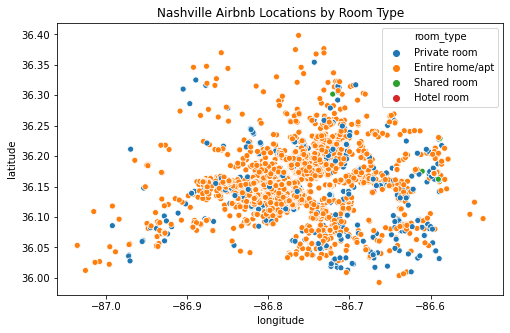

In [168]:
import seaborn as sns
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data=current_listings_df, x='longitude', y='latitude', hue='room_type')
ax.set_title('Nashville Airbnb Locations by Room Type');

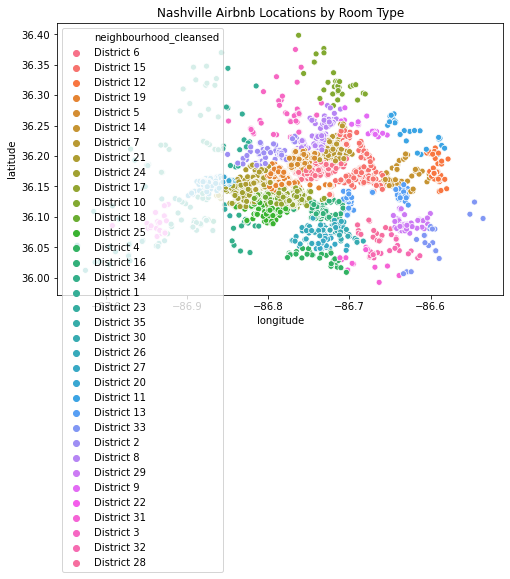

In [194]:
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data=current_listings_df, x='longitude', y='latitude', hue='neighbourhood_cleansed')
ax.set_title('Nashville Airbnb Locations by Room Type');

In [170]:
cur_listings_by_zip = current_listings_df.groupby(['zipcode']).count().sort_values(by='last_scraped', ascending=False)

In [171]:
cur_listings_by_zip

,last_scraped,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
zipcode,,,,,,,,,,,,,,,,,
37203.0,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776
37207.0,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761
37206.0,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477
37214.0,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427
37216.0,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349
37211.0,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310
37209.0,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300
37212.0,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251
37215.0,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88


### Create dataframes for each top zipcode

In [202]:
midtown_df = reg_airbnb_df[reg_airbnb_df['zipcode']==37203]
northnash_df = reg_airbnb_df[reg_airbnb_df['zipcode']==37207]
eastnash_df = reg_airbnb_df[reg_airbnb_df['zipcode']==37206]
donelson_df = reg_airbnb_df[reg_airbnb_df['zipcode']==37214]
inglewood_df = reg_airbnb_df[reg_airbnb_df['zipcode']==37216]
crievehall_df = reg_airbnb_df[reg_airbnb_df['zipcode']==37211]
westnash_df = reg_airbnb_df[reg_airbnb_df['zipcode']==37209]
belmont_df = reg_airbnb_df[reg_airbnb_df['zipcode']==37212]

### Group Airbnb Data by Month

In [172]:
reg_airbnb_df.set_index('last_scraped', inplace=True)

In [173]:
reg_airbnb_monthly = reg_airbnb_df.resample('MS')

In [174]:
reg_airbnb_monthly.count()

,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
last_scraped,,,,,,,,,,,,,,,,,
2015-06-01,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121
2015-07-01,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615
2015-08-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-09-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-10-01,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,6054,6054,6054,6054,6054,6054,6054,6054,6054,6054,6054,6054,6054,6054,6054,6054,6054
2020-11-01,5943,5943,5943,5943,5943,5943,5943,5943,5943,5943,5943,5943,5943,5943,5943,5943,5943
2020-12-01,6151,6151,6151,6151,6151,6151,6151,6151,6151,6151,6151,6151,6151,6151,6151,6151,6151


In [175]:
reg_airbnb_monthly_mean = reg_airbnb_monthly.mean()
reg_airbnb_monthly_mean

,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
last_scraped,,,,,,,,,,,,,
2015-06-01,1.847859e+07,37202.099174,36.161913,-86.768430,4.223140,1.433884,1.619835,2.033058,163.115702,1.859504,1.545455,889.553719,17.206612
2015-07-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01,1.857827e+07,37201.418483,36.156564,-86.767390,4.795735,1.522275,1.800000,2.406161,200.524171,2.200000,1.747867,836.094313,17.715640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,1.089264e+08,37202.053518,36.161076,-86.769561,6.280145,1.000000,2.230096,3.715725,212.630327,1.000000,5.341427,677.050875,53.893459
2020-11-01,1.117148e+08,37202.339223,36.160839,-86.770117,6.232711,1.000000,2.218913,3.693253,211.524146,1.000000,5.443210,671.420326,54.235403
2020-12-01,1.179998e+08,37202.157698,36.160300,-86.769277,6.199805,1.000000,2.214762,3.646236,212.372868,1.000000,7.771094,666.111201,53.628841


In [176]:
reg_airbnb_monthly_mean['inventory'] = reg_airbnb_monthly.count()['neighbourhood_cleansed']

In [177]:
reg_airbnb_monthly_mean

,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,inventory
last_scraped,,,,,,,,,,,,,,
2015-06-01,1.847859e+07,37202.099174,36.161913,-86.768430,4.223140,1.433884,1.619835,2.033058,163.115702,1.859504,1.545455,889.553719,17.206612,121
2015-07-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223,1615
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-10-01,1.857827e+07,37201.418483,36.156564,-86.767390,4.795735,1.522275,1.800000,2.406161,200.524171,2.200000,1.747867,836.094313,17.715640,2110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,1.089264e+08,37202.053518,36.161076,-86.769561,6.280145,1.000000,2.230096,3.715725,212.630327,1.000000,5.341427,677.050875,53.893459,6054
2020-11-01,1.117148e+08,37202.339223,36.160839,-86.770117,6.232711,1.000000,2.218913,3.693253,211.524146,1.000000,5.443210,671.420326,54.235403,5943
2020-12-01,1.179998e+08,37202.157698,36.160300,-86.769277,6.199805,1.000000,2.214762,3.646236,212.372868,1.000000,7.771094,666.111201,53.628841,6151


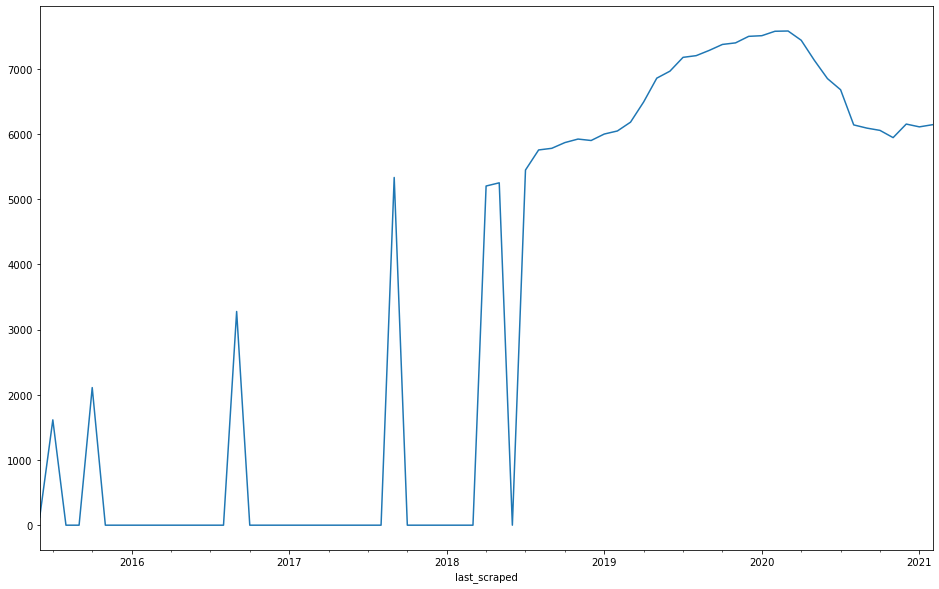

In [178]:
reg_airbnb_monthly_mean['inventory'].plot(figsize = (16,10));

### Group Airbnb Data by Zipcode then by Month

In [179]:
reg_airbnb_df.head()

,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
last_scraped,,,,,,,,,,,,,,,,,
2015-10-03,30066816,District 1,37080.0,36.274038,-86.910077,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,125.0,2.0,2.0,1125.0,19
2015-10-03,55304,District 1,37189.0,36.259632,-86.870691,House,Private room,4,1.0,1.0,3.0,Real Bed,75.0,1.0,1.0,1125.0,0
2015-10-03,3155867,District 1,37218.0,36.217547,-86.843971,House,Private room,2,0.5,1.0,1.0,Real Bed,45.0,1.0,2.0,1125.0,60
2015-10-03,1356379,District 1,37218.0,36.212933,-86.853004,House,Private room,2,1.0,1.0,1.0,Real Bed,150.0,2.0,1.0,1125.0,0
2015-10-03,5479170,District 1,37218.0,36.221009,-86.873935,House,Private room,1,2.0,1.0,1.0,Pull-out Sofa,150.0,1.0,1.0,1125.0,4


In [180]:
reg_airbnb_df.groupby(['zipcode']).count().sort_values(by=['host_id'], ascending=False)

,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
zipcode,,,,,,,,,,,,,,,,
37203.0,48560,48560,48560,48560,48560,48560,48560,48560,48560,48560,48560,48560,48560,48560,48560,48560
37206.0,28305,28305,28305,28305,28305,28305,28305,28305,28305,28305,28305,28305,28305,28305,28305,28305
37207.0,16509,16509,16509,16509,16509,16509,16509,16509,16509,16509,16509,16509,16509,16509,16509,16509
37212.0,16474,16474,16474,16474,16474,16474,16474,16474,16474,16474,16474,16474,16474,16474,16474,16474
37209.0,14276,14276,14276,14276,14276,14276,14276,14276,14276,14276,14276,14276,14276,14276,14276,14276
37216.0,14200,14200,14200,14200,14200,14200,14200,14200,14200,14200,14200,14200,14200,14200,14200,14200
37219.0,12614,12614,12614,12614,12614,12614,12614,12614,12614,12614,12614,12614,12614,12614,12614,12614
37208.0,12590,12590,12590,12590,12590,12590,12590,12590,12590,12590,12590,12590,12590,12590,12590,12590
37214.0,11415,11415,11415,11415,11415,11415,11415,11415,11415,11415,11415,11415,11415,11415,11415,11415


## Merge Airbnb and Zillow Data for Regression Model

In [181]:
nashville_prices_df

RegionName,37013,37211,37221,37209,37076,37115,37207,37214,37203,37217,...,37216,37212,37210,37204,37218,37080,37220,37219,37189,37201
index,,,,,,,,,,,,,,,,,,,,,
1996-01-31,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,87304.0,...,88121.0,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN
1996-02-29,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,87676.0,...,88466.0,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN
1996-03-31,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,87963.0,...,88751.0,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN
1996-04-30,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,88595.0,...,89336.0,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN
1996-05-31,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,89211.0,...,89922.0,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,259031.0,293072.0,352922.0,372219.0,276223.0,231768.0,275291.0,267812.0,444604.0,236802.0,...,353126.0,544627.0,287125.0,649146.0,241525.0,244317.0,561117.0,430796.0,266038.0,383293.0
2020-11-30,261394.0,295822.0,355478.0,375011.0,278581.0,233924.0,279386.0,270533.0,446004.0,238992.0,...,356012.0,546918.0,289395.0,654508.0,242735.0,246970.0,566165.0,430763.0,268952.0,383351.0
2020-12-31,264071.0,299249.0,358583.0,378519.0,281249.0,236437.0,283637.0,273683.0,447759.0,241559.0,...,359699.0,550457.0,292281.0,660564.0,244148.0,249040.0,572388.0,432595.0,271794.0,383955.0


In [182]:
nashville_prices_monthly = nashville_prices_df.resample('MS').mean()
nashville_prices_monthly

RegionName,37013,37211,37221,37209,37076,37115,37207,37214,37203,37217,...,37216,37212,37210,37204,37218,37080,37220,37219,37189,37201
index,,,,,,,,,,,,,,,,,,,,,
1996-01-01,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,87304.0,...,88121.0,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN
1996-02-01,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,87676.0,...,88466.0,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN
1996-03-01,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,87963.0,...,88751.0,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN
1996-04-01,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,88595.0,...,89336.0,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN
1996-05-01,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,89211.0,...,89922.0,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,259031.0,293072.0,352922.0,372219.0,276223.0,231768.0,275291.0,267812.0,444604.0,236802.0,...,353126.0,544627.0,287125.0,649146.0,241525.0,244317.0,561117.0,430796.0,266038.0,383293.0
2020-11-01,261394.0,295822.0,355478.0,375011.0,278581.0,233924.0,279386.0,270533.0,446004.0,238992.0,...,356012.0,546918.0,289395.0,654508.0,242735.0,246970.0,566165.0,430763.0,268952.0,383351.0
2020-12-01,264071.0,299249.0,358583.0,378519.0,281249.0,236437.0,283637.0,273683.0,447759.0,241559.0,...,359699.0,550457.0,292281.0,660564.0,244148.0,249040.0,572388.0,432595.0,271794.0,383955.0


In [183]:
#col = nashville_prices_monthly.loc[: , "37013":"37201"]
nashville_prices_monthly['total_average'] = nashville_prices_monthly.mean(axis=1)

In [184]:
nashville_prices_monthly

RegionName,37013,37211,37221,37209,37076,37115,37207,37214,37203,37217,...,37212,37210,37204,37218,37080,37220,37219,37189,37201,total_average
index,,,,,,,,,,,,,,,,,,,,,
1996-01-01,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,87304.0,...,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN,122768.727273
1996-02-01,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,87676.0,...,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN,123137.227273
1996-03-01,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,87963.0,...,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN,123527.681818
1996-04-01,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,88595.0,...,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN,124310.181818
1996-05-01,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,89211.0,...,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN,125210.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,259031.0,293072.0,352922.0,372219.0,276223.0,231768.0,275291.0,267812.0,444604.0,236802.0,...,544627.0,287125.0,649146.0,241525.0,244317.0,561117.0,430796.0,266038.0,383293.0,375489.120000
2020-11-01,261394.0,295822.0,355478.0,375011.0,278581.0,233924.0,279386.0,270533.0,446004.0,238992.0,...,546918.0,289395.0,654508.0,242735.0,246970.0,566165.0,430763.0,268952.0,383351.0,378282.360000
2020-12-01,264071.0,299249.0,358583.0,378519.0,281249.0,236437.0,283637.0,273683.0,447759.0,241559.0,...,550457.0,292281.0,660564.0,244148.0,249040.0,572388.0,432595.0,271794.0,383955.0,381649.480000


In [186]:
nash_price_avg = nashville_prices_monthly['total_average']

In [187]:
regression_df = pd.merge(reg_airbnb_monthly_mean, nash_price_avg, how='inner',
                        left_index=True, right_index=True)
regression_df

,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,inventory,total_average
2015-06-01,1.847859e+07,37202.099174,36.161913,-86.768430,4.223140,1.433884,1.619835,2.033058,163.115702,1.859504,1.545455,889.553719,17.206612,121,248302.80
2015-07-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223,1615,250573.92
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,252813.76
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,255660.52
2015-10-01,1.857827e+07,37201.418483,36.156564,-86.767390,4.795735,1.522275,1.800000,2.406161,200.524171,2.200000,1.747867,836.094313,17.715640,2110,258221.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,1.089264e+08,37202.053518,36.161076,-86.769561,6.280145,1.000000,2.230096,3.715725,212.630327,1.000000,5.341427,677.050875,53.893459,6054,375489.12
2020-11-01,1.117148e+08,37202.339223,36.160839,-86.770117,6.232711,1.000000,2.218913,3.693253,211.524146,1.000000,5.443210,671.420326,54.235403,5943,378282.36
2020-12-01,1.179998e+08,37202.157698,36.160300,-86.769277,6.199805,1.000000,2.214762,3.646236,212.372868,1.000000,7.771094,666.111201,53.628841,6151,381649.48
2021-01-01,1.191308e+08,37201.978389,36.160192,-86.769101,6.204158,1.000000,2.220530,3.650295,225.423215,1.000000,7.493942,659.377865,54.544368,6108,384369.80


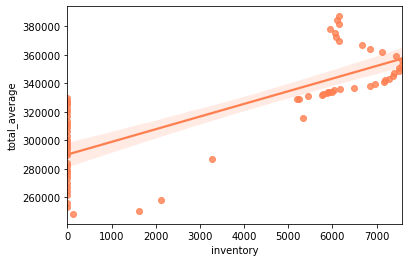

In [188]:
sns.regplot(x="inventory", y="total_average", data=regression_df, color="coral");

In [189]:
regression_df.isna().sum()

host_id              30
zipcode              30
latitude             30
longitude            30
accommodates         30
bathrooms            30
bedrooms             30
beds                 30
price                30
guests_included      30
minimum_nights       30
maximum_nights       30
number_of_reviews    30
inventory             0
total_average         0
dtype: int64

In [190]:
regression_df.dropna(inplace=True)

In [191]:
regression_df

,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,inventory,total_average
2015-06-01,1.847859e+07,37202.099174,36.161913,-86.768430,4.223140,1.433884,1.619835,2.033058,163.115702,1.859504,1.545455,889.553719,17.206612,121,248302.80
2015-07-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223,1615,250573.92
2015-10-01,1.857827e+07,37201.418483,36.156564,-86.767390,4.795735,1.522275,1.800000,2.406161,200.524171,2.200000,1.747867,836.094313,17.715640,2110,258221.84
2016-09-01,2.994063e+07,37200.010986,36.155576,-86.763946,5.105584,1.566677,1.883430,2.602991,196.314922,2.358560,2.063168,656141.164785,25.443699,3277,286736.04
2017-09-01,5.042165e+07,37200.222056,36.158658,-86.767780,5.366467,1.647787,1.956677,2.836834,209.013691,2.710240,2.117404,404179.796887,31.943173,5332,315522.64
2018-04-01,6.067386e+07,37201.877331,36.158235,-86.769768,5.611229,1.688714,1.946164,3.054797,214.792540,2.973467,2.297827,717.517208,38.099596,5201,328666.16
2018-05-01,6.176645e+07,37202.641714,36.158711,-86.769855,5.621905,1.684000,1.937143,3.071048,213.065333,2.963429,2.272190,697.824571,39.961143,5250,329114.84
2018-07-01,6.572420e+07,37202.329600,36.159961,-86.769664,5.721998,1.705288,1.965112,3.114947,212.888542,3.033235,2.262211,702.283878,40.941241,5446,330742.80
2018-08-01,6.784536e+07,37202.036496,36.159616,-86.769322,5.727320,1.702902,1.964199,3.102364,213.645985,3.032673,3.046750,373898.911192,40.988182,5754,331859.80
2018-09-01,6.845054e+07,37201.921267,36.159399,-86.768838,5.703063,1.695795,1.963488,3.098806,210.786122,3.014535,3.238450,372299.886832,42.363731,5779,332825.48


In [192]:
regression_df.to_csv("cleaned_data/reg_data_clean.csv")